In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

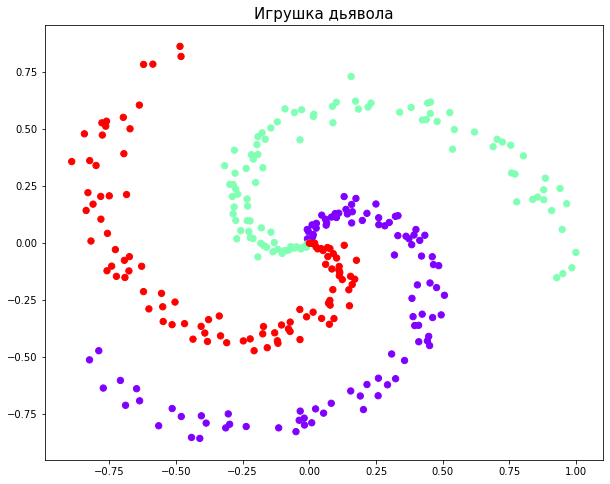

In [2]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Игрушка дьявола', fontsize=15)
plt.show()

In [3]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [4]:
print(X.data.shape, y.data.shape)

torch.Size([300, 2]) torch.Size([300])


In [5]:
# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 2, 100, 3

two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr=learning_rate)
for t in range(2500):
    # forward
    y_pred = two_layer_net(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # ЗАНУЛЯЕМ!
    optimizer.zero_grad()

    # backward
    loss.backward()

    # ОБНОВЛЯЕМ! 
    optimizer.step()

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 328.98272705078125
1 328.9161376953125
2 328.8525085449219
3 328.7898254394531
4 328.7274475097656
5 328.66571044921875
6 328.60498046875
7 328.54559326171875
8 328.4867248535156
9 328.42913818359375
10 328.3719177246094
11 328.31512451171875
12 328.25872802734375
13 328.2029113769531
14 328.1477966308594
15 328.0939636230469
16 328.0411376953125
17 327.9888916015625
18 327.9371643066406
19 327.885498046875
20 327.8335876464844
21 327.78167724609375
22 327.72979736328125
23 327.6783752441406
24 327.6268615722656
25 327.5757751464844
26 327.5245056152344
27 327.4733581542969
28 327.42291259765625
29 327.3720397949219
30 327.3216857910156
31 327.27099609375
32 327.22076416015625
33 327.1701965332031
34 327.1198425292969
35 327.0696716308594
36 327.01934814453125
37 326.96881103515625
38 326.91864013671875
39 326.86883544921875
40 326.81927490234375
41 326.7698669433594
42 326.7204895019531
43 326.6712646484375
44 326.6214294433594
45 326.5718078613281
46 326.5222473144531
47 326.472656

376 237.0034942626953
377 236.54588317871094
378 236.09034729003906
379 235.63673400878906
380 235.18484497070312
381 234.73504638671875
382 234.2872314453125
383 233.8414306640625
384 233.39755249023438
385 232.9560546875
386 232.51634216308594
387 232.0785675048828
388 231.64239501953125
389 231.20858764648438
390 230.776611328125
391 230.3465118408203
392 229.918212890625
393 229.49209594726562
394 229.0680694580078
395 228.64663696289062
396 228.22723388671875
397 227.8102569580078
398 227.39593505859375
399 226.9835662841797
400 226.57345581054688
401 226.16506958007812
402 225.75900268554688
403 225.35523986816406
404 224.95346069335938
405 224.5537872314453
406 224.15628051757812
407 223.76087951660156
408 223.36753845214844
409 222.9761505126953
410 222.58660888671875
411 222.1989288330078
412 221.8136749267578
413 221.43063354492188
414 221.04905700683594
415 220.66969299316406
416 220.29269409179688
417 219.91778564453125
418 219.54490661621094
419 219.17401123046875
420 218.

741 125.09890747070312
742 124.73927307128906
743 124.37895965576172
744 124.01840209960938
745 123.65745544433594
746 123.29631042480469
747 122.93502044677734
748 122.5733413696289
749 122.21135711669922
750 121.84896850585938
751 121.4863510131836
752 121.12362670898438
753 120.76054382324219
754 120.39720153808594
755 120.0341796875
756 119.67056274414062
757 119.30686950683594
758 118.94322967529297
759 118.57947540283203
760 118.21569061279297
761 117.8517837524414
762 117.48767852783203
763 117.12371063232422
764 116.75978088378906
765 116.39601135253906
766 116.03207397460938
767 115.6681900024414
768 115.30435943603516
769 114.9404525756836
770 114.57686614990234
771 114.21318817138672
772 113.84950256347656
773 113.48590850830078
774 113.12222290039062
775 112.75862121582031
776 112.3949203491211
777 112.0313491821289
778 111.66787719726562
779 111.3046646118164
780 110.94197082519531
781 110.5804214477539
782 110.21927642822266
783 109.85840606689453
784 109.49775695800781
7

1105 40.22541046142578
1106 40.13606262207031
1107 40.046993255615234
1108 39.9583854675293
1109 39.87027359008789
1110 39.78264617919922
1111 39.69547653198242
1112 39.60873031616211
1113 39.52233123779297
1114 39.4362678527832
1115 39.350738525390625
1116 39.26613235473633
1117 39.18185043334961
1118 39.09758758544922
1119 39.01441955566406
1120 38.93062973022461
1121 38.84737777709961
1122 38.76473617553711
1123 38.682437896728516
1124 38.600608825683594
1125 38.51918411254883
1126 38.43827819824219
1127 38.357887268066406
1128 38.27783966064453
1129 38.19816207885742
1130 38.11885070800781
1131 38.03982162475586
1132 37.96112823486328
1133 37.88273239135742
1134 37.80473327636719
1135 37.72711944580078
1136 37.64985656738281
1137 37.57295608520508
1138 37.49647521972656
1139 37.42033386230469
1140 37.344512939453125
1141 37.268951416015625
1142 37.19369888305664
1143 37.11878967285156
1144 37.044071197509766
1145 36.969730377197266
1146 36.89569091796875
1147 36.821895599365234
114

1453 23.03665542602539
1454 23.00933074951172
1455 22.982057571411133
1456 22.954986572265625
1457 22.92780303955078
1458 22.900667190551758
1459 22.87368392944336
1460 22.846843719482422
1461 22.819997787475586
1462 22.793222427368164
1463 22.766483306884766
1464 22.73993492126465
1465 22.713504791259766
1466 22.686899185180664
1467 22.660612106323242
1468 22.634231567382812
1469 22.608123779296875
1470 22.58188819885254
1471 22.555744171142578
1472 22.529489517211914
1473 22.503517150878906
1474 22.477508544921875
1475 22.451704025268555
1476 22.425722122192383
1477 22.39996910095215
1478 22.3742733001709
1479 22.348655700683594
1480 22.323026657104492
1481 22.297475814819336
1482 22.271888732910156
1483 22.24648094177246
1484 22.22111701965332
1485 22.19587516784668
1486 22.17073631286621
1487 22.14554786682129
1488 22.120267868041992
1489 22.09518051147461
1490 22.07012367248535
1491 22.04500961303711
1492 22.020231246948242
1493 21.99529266357422
1494 21.970508575439453
1495 21.94

1800 16.49628257751465
1801 16.48328399658203
1802 16.470006942749023
1803 16.45693588256836
1804 16.44386863708496
1805 16.43092918395996
1806 16.41780662536621
1807 16.405078887939453
1808 16.391876220703125
1809 16.37905502319336
1810 16.366050720214844
1811 16.353248596191406
1812 16.34021759033203
1813 16.3273868560791
1814 16.31458854675293
1815 16.30179214477539
1816 16.28890037536621
1817 16.276378631591797
1818 16.26347541809082
1819 16.250886917114258
1820 16.238140106201172
1821 16.225675582885742
1822 16.212875366210938
1823 16.200380325317383
1824 16.18771743774414
1825 16.175199508666992
1826 16.16244125366211
1827 16.149965286254883
1828 16.137447357177734
1829 16.124954223632812
1830 16.11243438720703
1831 16.100210189819336
1832 16.087860107421875
1833 16.07563591003418
1834 16.063308715820312
1835 16.051490783691406
1836 16.038949966430664
1837 16.027050018310547
1838 16.014699935913086
1839 16.002872467041016
1840 15.99026870727539
1841 15.978468894958496
1842 15.965

2144 13.08601188659668
2145 13.078630447387695
2146 13.071194648742676
2147 13.06368637084961
2148 13.056378364562988
2149 13.048930168151855
2150 13.041532516479492
2151 13.034152030944824
2152 13.026823997497559
2153 13.019547462463379
2154 13.012211799621582
2155 13.004941940307617
2156 12.997537612915039
2157 12.990294456481934
2158 12.983010292053223
2159 12.97587776184082
2160 12.968467712402344
2161 12.961267471313477
2162 12.953923225402832
2163 12.946782112121582
2164 12.939374923706055
2165 12.932334899902344
2166 12.924971580505371
2167 12.917853355407715
2168 12.910441398620605
2169 12.903315544128418
2170 12.895988464355469
2171 12.889081954956055
2172 12.881619453430176
2173 12.874807357788086
2174 12.867403030395508
2175 12.860328674316406
2176 12.852998733520508
2177 12.84603500366211
2178 12.838680267333984
2179 12.831727981567383
2180 12.824504852294922
2181 12.817611694335938
2182 12.810343742370605
2183 12.803152084350586
2184 12.795960426330566
2185 12.788730621337

2488 11.042072296142578
2489 11.03743839263916
2490 11.032586097717285
2491 11.027953147888184
2492 11.02308177947998
2493 11.01844310760498
2494 11.013680458068848
2495 11.009100914001465
2496 11.004267692565918
2497 10.9996337890625
2498 10.994795799255371
2499 10.990163803100586


In [6]:
# Обратно в Numpy для отрисовки
X = X.data.numpy()
y = y.data.numpy()

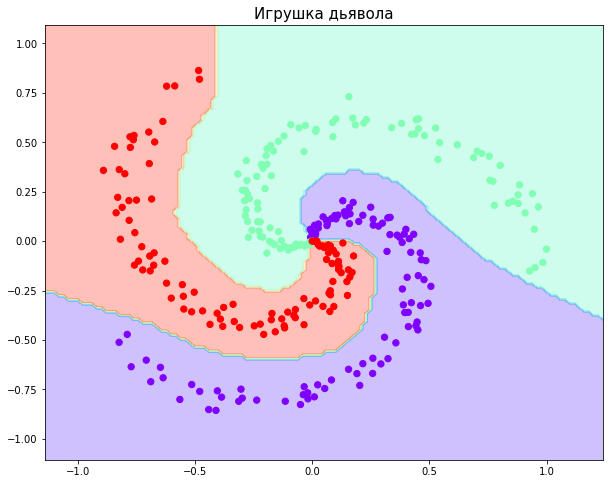

In [7]:
h = 0.02
x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25 
y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25 

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Игрушка дьявола', fontsize=15)
plt.show();